In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plots import *

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_excel('Dataset2.xlsx')
df.head()

,X,Y
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [6]:
X = df.iloc[:,0].to_numpy()
y = df.iloc[:,1].to_numpy()

Text(0, 0.5, 'y')

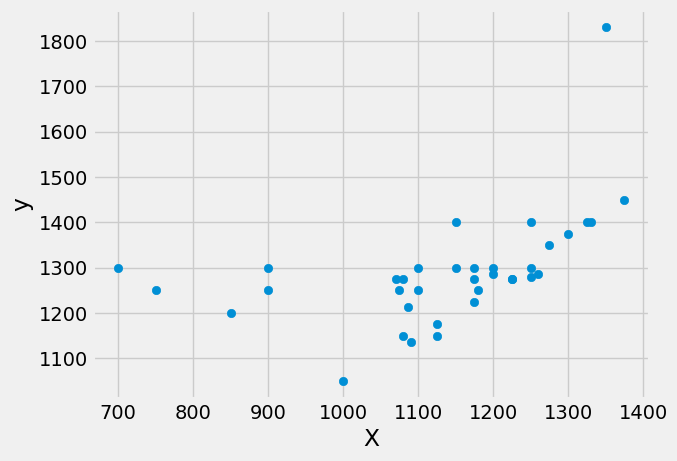

In [7]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

In [8]:
# Shuffles the indices
idx = np.arange(X.shape[0])
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(X.shape[0]*.8)]

# Uses the remaining indices for validation
val_idx = idx[int(X.shape[0]*.8):]

# Generates train and validation sets
X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]

In [9]:
np.random.seed(42)
b = np.random.randn(28)
w = np.random.randn(28)

print(b, w)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802] [-0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722 -1.05771093
  0.82254491 -1.22084365  0.2088636  -1.95967012 -1.32818605  0.19686124
  0.73846658  0.17136828 -0.11564828 -0.3011037  -1.47852199 -0.71984421
 -0.46063877  1.05712223  0.34361829 -1.76304016  0.32408397 -0.38508228
 -0.676922    0.61167629  1.03099952  0.93128012]


In [10]:
(b + (w * X_train)).shape

(28,)

In [11]:
yhat = b + w * X_train
yhat

array([ -642.18668406,  -313.70904533,  -766.52824205,  2085.33598743,
         -17.24065654, -1295.93002493,   947.50586173,  -853.82312025,
         286.71796875, -2115.90117375, -1627.49132759,   245.61081508,
         923.32518727,   199.44445015,  -128.93802846,  -331.77635268,
       -1738.2761698 ,  -782.15640719,  -415.48291794,  1399.27464604,
         310.72210938, -1498.80990836,   388.96829148,  -444.26937066,
        -914.38908314,   734.1224692 ,  1339.14838567,  1238.97825644])

In [12]:
error = (yhat - y_train)

loss = (error ** 2).mean()
print(loss)

3162177.2006372386


In [13]:
true_b = 1
true_w = 2

b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)

# values for all combinations
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

In [14]:
sample_x = X_train[0]
sample_yhat = bs + ws * sample_x
sample_yhat.shape

(101, 101)

In [15]:
b_grad = 2 * error.mean()
w_grad = 2 * (X_train * error).mean()
print(b_grad, w_grad)

-2903.6252917229294 -3253253.3482071087


In [16]:
lr = 0.1
print(b, w)

b_grad = 2 * error.mean() 
w_grad = 2 * (X_train * error).mean()
print(b_grad, w_grad)

b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802] [-0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722 -1.05771093
  0.82254491 -1.22084365  0.2088636  -1.95967012 -1.32818605  0.19686124
  0.73846658  0.17136828 -0.11564828 -0.3011037  -1.47852199 -0.71984421
 -0.46063877  1.05712223  0.34361829 -1.76304016  0.32408397 -0.38508228
 -0.676922    0.61167629  1.03099952  0.93128012]
-2903.6252917229294 -3253253.3482071087
[290.85924333 290.22426487 291.01021771 291.88555903 290.1283758
 290.12839222 291.94174199 291.1299639  289.89305479 290.90508922
 289.89911148 289.89679942 290.60449144 288.44924893 288.63761134
 289.80024164 289.34969805 290.6767765  289.4545051  288.95022547
 291.82817794

In [17]:
def compute_cost(x, y, w, b):
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [18]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [19]:
import math, copy
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db}  ",
                  f"w: {w}, b:{b}")
 
    return w, b, J_history, p_history

In [20]:
w_init = np.zeros(28)
b_init = np.zeros(28)
iterations = 70
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(X_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration    0: Cost [1.56337559e+14 1.56337559e+14 1.56337559e+14 1.56337559e+14
 1.56337559e+14 1.56337559e+14 1.56337559e+14 1.56337559e+14
 1.56337559e+14 1.56337559e+14 1.56337559e+14 1.56337559e+14
 1.56337559e+14 1.56337559e+14 1.56337559e+14 1.56337559e+14
 1.56337559e+14 1.56337559e+14 1.56337559e+14 1.56337559e+14
 1.56337559e+14 1.56337559e+14 1.56337559e+14 1.56337559e+14
 1.56337559e+14 1.56337559e+14 1.56337559e+14 1.56337559e+14]  dj_dw: [-1523602.89285714 -1523602.89285714 -1523602.89285714 -1523602.89285714
 -1523602.89285714 -1523602.89285714 -1523602.89285714 -1523602.89285714
 -1523602.89285714 -1523602.89285714 -1523602.89285714 -1523602.89285714
 -1523602.89285714 -1523602.89285714 -1523602.89285714 -1523602.89285714
 -1523602.89285714 -1523602.89285714 -1523602.89285714 -1523602.89285714
 -1523602.89285714 -1523602.89285714 -1523602.89285714 -1523602.89285714
 -1523602.89285714 -1523602.89285714 -1523602.89285714 -1523602.89285714], dj_db: [-1316.53571429 -1316.5

C:\Users\user\AppData\Local\Temp\ipykernel_12344\257174254.py:7: RuntimeWarning: overflow encountered in square
  cost = cost + (f_wb - y[i])**2


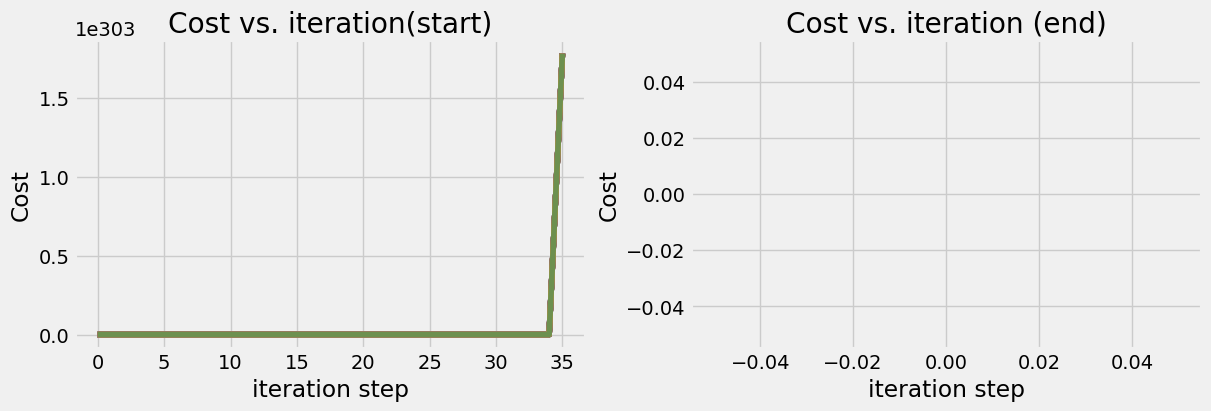

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [22]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_final[i] * X_train[i] + b_final[i]
predicted

array([-1.37898097e+292, -1.38542480e+292, -1.64317805e+292,
       -1.44986311e+292, -1.62384655e+292, -1.57873973e+292,
       -1.48208227e+292, -9.02137462e+291, -1.77205467e+292,
       -1.39186863e+292, -1.57873973e+292, -1.61095889e+292,
       -1.61095889e+292, -1.51430142e+292, -1.41764395e+292,
       -1.41764395e+292, -1.51430142e+292, -1.40088999e+292,
       -1.15989071e+292, -1.70761636e+292, -1.15989071e+292,
       -1.09545240e+292, -1.54652058e+292, -1.48208227e+292,
       -1.73983551e+292, -1.54652058e+292, -1.67539720e+292,
       -1.71406019e+292])

Text(0.5, 0, 'x')

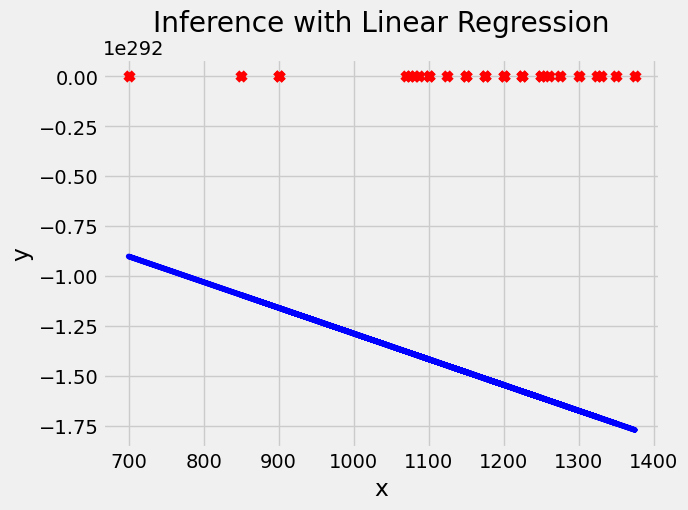

In [23]:
plt.plot(X_train, predicted, c = "b")

plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Inference with Linear Regression")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')

In [24]:
from sklearn.metrics import r2_score
score = r2_score(yhat, predicted)
score

c:\Users\user\anaconda3\envs\pycaretenv\lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


-inf

c:\Users\user\anaconda3\envs\pycaretenv\lib\site-packages\scipy\linalg\_basic.py:1298: RuntimeWarning: overflow encountered in square
  resids = np.sum(np.abs(x[n:])**2, axis=0)


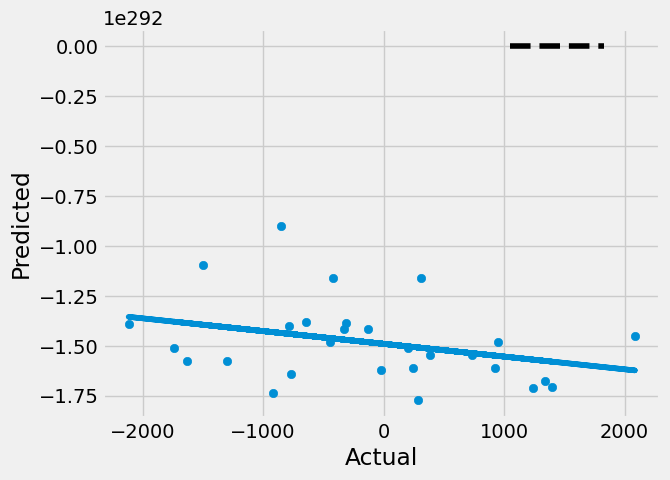

In [25]:
fig, ax = plt.subplots()
ax.scatter(yhat, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, y_predicted = yhat.reshape(-1,1), predicted.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_predicted).predict(y_test))

plt.show()

In [26]:
import numpy as np

def vectorized_compute_cost(X, y, w):
    m = len(y)
    predictions = np.dot(X, w)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error**2)
    return cost

def vectorized_compute_gradient(X, y, w):
    m = len(y)
    predictions = np.dot(X, w)
    error = predictions - y
    gradient = (1 / m) * np.dot(X.T, error)
    return gradient

def gradient_descent(X, y, w, learning_rate, num_epochs):
    m = len(y)
    loss_history = []

    for epoch in range(num_epochs):
        gradient = vectorized_compute_gradient(X, y, w)
        w -= learning_rate * gradient
        cost = vectorized_compute_cost(X, y, w)
        loss_history.append(cost)

    return w, loss_history

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
# Load the Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Set hyperparameters
num_epochs = 1000
learning_rate = 0.01

# Initialize theta
w = np.zeros(X.shape[1])

w, loss_history = gradient_descent(X, y, w, learning_rate, num_epochs)